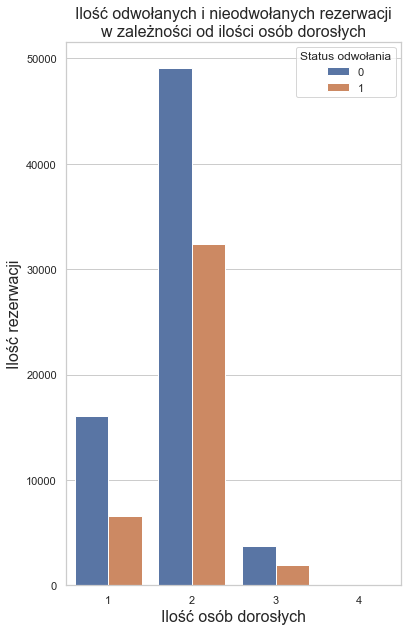

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
# tabela_glowna.isna().any()

tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek
# tabela_wiek.isna().any()

#dorosli bez dzieci
dorosli = tabela_wiek[(tabela_wiek['adults']!=0) & (tabela_wiek['children']==0) & (tabela_wiek['babies']==0)][['is_canceled','adults']]
dorosli
dorosli['ilosc'] = 1
dorosli_df = dorosli[dorosli['adults'] <= 4].groupby(by=['is_canceled','adults']) #z tego widac ze powyzej 4 dorołych jest zawsze anulowne
rezerwacje = dorosli_df.count().values.tolist()
rezerwacje
ilosc_rezerwacji = []
for element in rezerwacje:
    for el in element:
        ilosc_rezerwacji.append(el)

ilosc_rezerwacji

W = []
status_odwoalania = []
ilosc_doroslych = []

for key, value in dorosli_df:
    key = list(key)
    W.append(key)

for m, n in W:
    status_odwoalania.append(m)
    ilosc_doroslych.append(n)

wykres_1={
    'ilosc_rezerwacji':ilosc_rezerwacji,
    'status_odwolania':status_odwoalania,
    'ilosc_doroslych':ilosc_doroslych}
wykres_1
wykres_1_df = pd.DataFrame(wykres_1)
wykres_1_df

labels=["Nieodwołane","Odwołane"]
wykres_1_df["status_odwolania_2"] = wykres_1_df["status_odwolania"].map(dict(zip(range(0,2), labels)))

f, ax = plt.subplots(figsize=(6, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="ilosc_doroslych", y="ilosc_rezerwacji", hue="status_odwolania", data=wykres_1_df)
wykres_3 = plt.title("Ilość odwołanych i nieodwołanych rezerwacji\nw zależności od ilości osób dorosłych", fontsize=16)
wykres_3 = plt.xlabel("Ilość osób dorosłych", fontsize=16)
wykres_3 = plt.ylabel("Ilość rezerwacji", fontsize=16)
wykres_3 = plt.legend(loc="upper right", title = "Status odwołania")


<AxesSubplot:xlabel='ilosc_doroslych', ylabel='ilosc_rezerwacji_odwolane'>

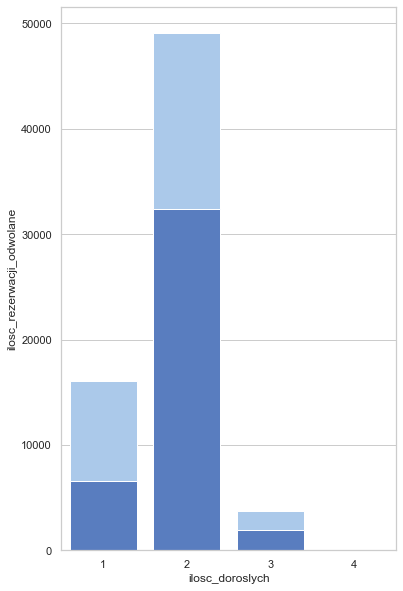

In [5]:
dorosli = tabela_wiek[(tabela_wiek['adults']!=0) & (tabela_wiek['children']==0) & (tabela_wiek['babies']==0)][['is_canceled','adults']]
dorosli
dorosli_df_odwolane = dorosli[(dorosli['adults'] <= 4) & (dorosli['is_canceled'] == 1)].groupby(by='adults')
rezerwacje_odwolane = dorosli_df_odwolane.count().values.tolist()
rezerwacje_odwolane
ilosc_rezerwacji_odwolane = []
for element in rezerwacje_odwolane:
    for el in element:
        ilosc_rezerwacji_odwolane.append(el)

ilosc_rezerwacji_odwolane

dorosli_df_nieodwolane = dorosli[(dorosli['adults'] <= 4) & (dorosli['is_canceled'] == 0)].groupby(by='adults')
rezerwacje_nieodwolane = dorosli_df_nieodwolane.count().values.tolist()
rezerwacje_nieodwolane
ilosc_rezerwacji_nieodwolane = []
for element in rezerwacje_nieodwolane:
    for el in element:
        ilosc_rezerwacji_nieodwolane.append(el)

ilosc_rezerwacji_nieodwolane

ilosc_doroslych = []

for key, value in dorosli_df_nieodwolane:
    ilosc_doroslych.append(key)

ilosc_doroslych


wykres_1={
    'ilosc_rezerwacji_odwolane':ilosc_rezerwacji_odwolane,
    'ilosc_rezerwacji_nieodwolane':ilosc_rezerwacji_nieodwolane,
    'ilosc_doroslych':ilosc_doroslych}
wykres_1
wykres_1_df = pd.DataFrame(wykres_1)
wykres_1_df['total'] = wykres_1_df['ilosc_rezerwacji_odwolane'] + wykres_1_df['ilosc_rezerwacji_nieodwolane'] 
wykres_1_df

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 10))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="ilosc_doroslych", y='ilosc_rezerwacji_nieodwolane', data=wykres_1_df,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="ilosc_doroslych", y='ilosc_rezerwacji_odwolane', data=wykres_1_df,
            label="Alcohol-involved", color="b")

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)